In [1]:
# check opencv version
import cv2
# print version number
print(cv2.__version__)

4.10.0


In [2]:
# example of face detection with opencv cascade classifier
from cv2 import imread
from cv2 import CascadeClassifier

# load the photograph
pixels = imread('test1.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
    print(box)

[363 104  97  97]
[173  74 108 108]


In [3]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle


# load the photograph
pixels = imread('test1.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
    # extract
    x, y, width, height = box
    x2, y2 = x + width, y + height

    # draw a rectangle over the pixels
    rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)

# show the image
imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

In [14]:
# confirm mtcnn was installed correctly
import mtcnn

In [22]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle, Circle


# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)

for face in faces:
    print(face)

{'box': [371, 81, 97, 128], 'confidence': np.float64(0.9981270432472229), 'keypoints': {'nose': [np.int64(407), np.int64(167)], 'mouth_right': [np.int64(437), np.int64(175)], 'right_eye': [np.int64(437), np.int64(138)], 'left_eye': [np.int64(392), np.int64(133)], 'mouth_left': [np.int64(389), np.int64(171)]}}
{'box': [188, 67, 86, 119], 'confidence': np.float64(0.9968366622924805), 'keypoints': {'nose': [np.int64(220), np.int64(143)], 'mouth_right': [np.int64(244), np.int64(157)], 'right_eye': [np.int64(251), np.int64(119)], 'left_eye': [np.int64(208), np.int64(109)], 'mouth_left': [np.int64(199), np.int64(147)]}}


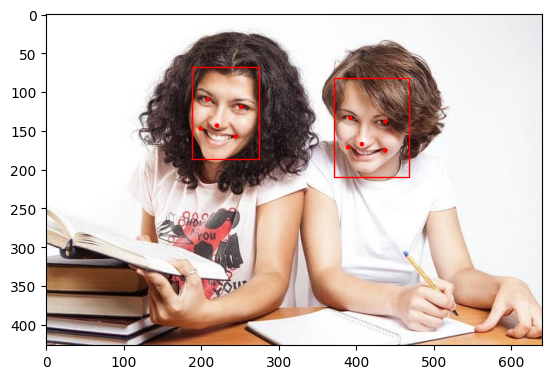

In [23]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)

        # draw the dots
        for _, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    
    # show the plot
    pyplot.show()

filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)


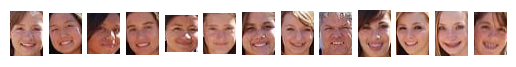

In [28]:
# draw each face separately
def draw_faces(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
    # show the plot
    pyplot.show()

filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)